In [1]:
#import basic libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
data=pd.read_csv('insurance.csv',delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
#Examine the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Examine the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## We visualize the data

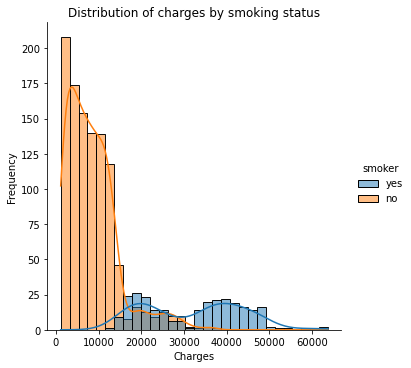

In [5]:
sns.displot(data=data, x='charges', hue='smoker',kde=True)
plt.title('Distribution of charges by smoking status')
plt.xlabel('Charges')
plt.ylabel('Frequency');


## We notice that charges inflated by smokers, maybe smoking is a crucial factor which affects charge

Text(336.9714285714286, 0.5, 'Age')

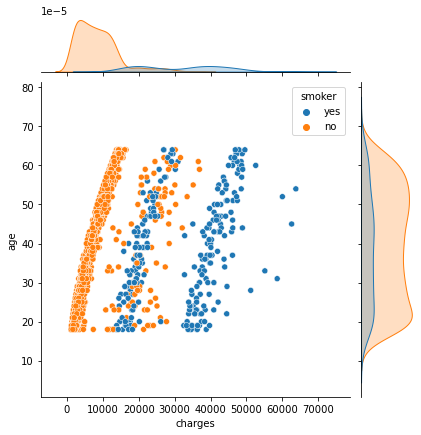

In [6]:
sns.jointplot(data=data,x='charges',y='age',hue='smoker')
plt.xlabel('Charges')
plt.ylabel('Age')


## This figure depicts the same thing plus the age of the agent is a factor that increses charges

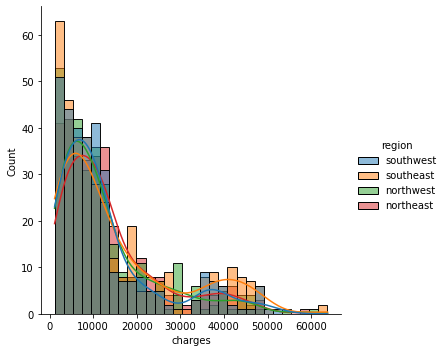

In [7]:
# Charges correlation with region
sns.displot(data=data, x='charges', hue='region',kde=True)

<AxesSubplot:xlabel='region', ylabel='count'>

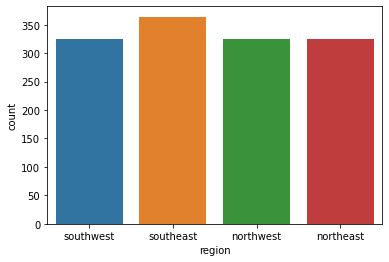

In [8]:
# Region allocation
sns.countplot(data=data,x='region')

## There are a little more observations from southeast region, also people from southeast have larger charges

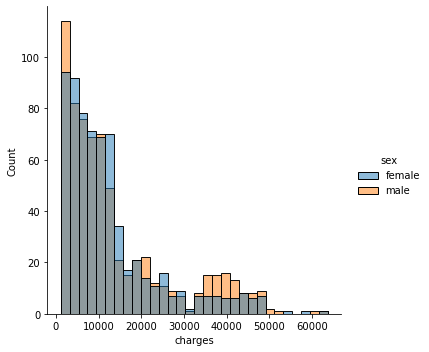

In [9]:
sns.displot(data=data,x='charges',hue='sex')

## Seems that men produces higher charges than women, but it is not very clear

Text(336.9714285714286, 0.5, 'BMI')

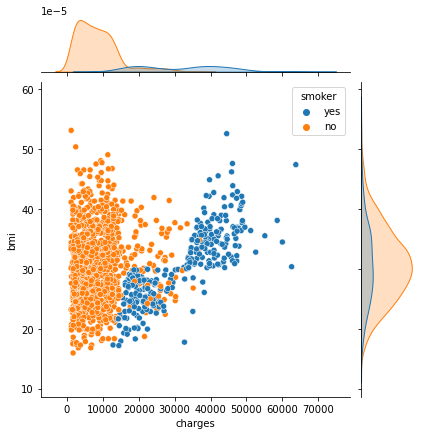

In [10]:
sns.jointplot(data=data,x='charges',y='bmi',hue='smoker')

plt.xlabel('Charges')
plt.ylabel('BMI')

## BMI factor seems to increce charges, it is worth to mention that the combination of high bmi and smoking increases  charges

<AxesSubplot:xlabel='children', ylabel='charges'>

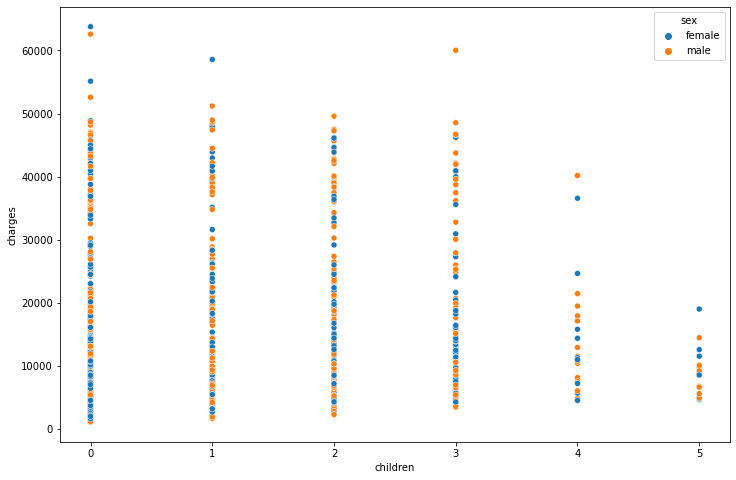

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='children',y='charges',data=data,hue='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

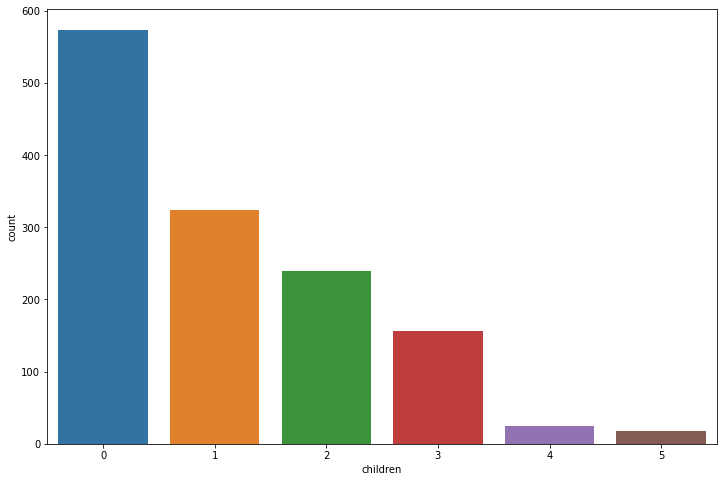

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='children')

## Seems like the more children someone has produces less charges, but i can't find any reason for that, also in the sample there are a few observations with many children.

## The prediction model with use all the independand variables in the beginning

### There are 3 categorical variables which have to tranform in order to be used by the model

In [13]:
smokes=pd.get_dummies(data.smoker,prefix='Smokes',prefix_sep='-',drop_first=True)

In [14]:
gender=pd.get_dummies(data.sex,drop_first=True)

In [15]:
region=pd.get_dummies(data.region,drop_first=True,prefix='Region',prefix_sep='-')

## Now the dummies are created we have to drop initial variables and concat the new constructed dummies

In [16]:
data=data.drop(['sex','smoker','region'],axis=1)

In [17]:
data=pd.concat([data,smokes,region,gender],axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   Smokes-yes        1338 non-null   uint8  
 5   Region-northwest  1338 non-null   uint8  
 6   Region-southeast  1338 non-null   uint8  
 7   Region-southwest  1338 non-null   uint8  
 8   male              1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [19]:
data.head()

,age,bmi,children,charges,Smokes-yes,Region-northwest,Region-southeast,Region-southwest,male
0,19,27.900,0,16884.92400,1,0,0,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1


In [20]:
# Dataset is ok now we have to separate target and features
X=data.drop(['charges'],axis=1)
y=data.charges

In [21]:
# We will use 25% of the dataset as test data and the other 75% as train data
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=10)

In [23]:
# The first algorith that we will implement is linear regression
from sklearn.linear_model import LinearRegression

In [24]:
# We will train it on train data 
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
# Importing metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error

In [26]:
# We will test our model in test data which are "unknown" to the model
r2_score(y_test,reg.predict(X_test))

0.7162745306503483

## R2 score implies that 71,6% of charges variance is explained by our features

In [27]:
# Now we will examine the mean absolute error
print(f" Mean absolure error  is  {round(mean_absolute_error(y_test,reg.predict(X_test)),2)}")

 Mean absolure error  is  4303.56


In [28]:
print(f"Mean charges value is {round(y_test.mean(),2)}")

Mean charges value is 13079.29


## There is average a deviation of 4303 up and down from 13074 which seems to be wide enough

In [29]:
# Now we will try to find less sigificant variables in oredr to extract them from model
# Retrieve coefficients
coefficients = reg.coef_

# Normalize coefficients 
coefficients_normalized = coefficients / np.abs(coefficients).sum()

# Rank features based on coefficients
feature_importance = list(zip(X_train.columns, coefficients_normalized))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

Smokes-yes: 0.8923025254949358
Region-southeast: -0.031960512145253424
children: 0.020598046764959858
Region-southwest: -0.02013923341574938
bmi: 0.012935643893606338
age: 0.009567295211452196
male: -0.00949888579140854
Region-northwest: 0.002997857282634472


In [30]:
# Seem like age and gender have less than 1% influence
# We will try to exclude these variables 
X=X.drop(['age','male'],axis=1)


In [31]:
# Again separate data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25)

In [32]:
# We will train it on train data 
reg2=LinearRegression()
reg2.fit(X_train,y_train)

LinearRegression()

In [33]:
# We will test our model in test data which are "unknown" to the model
r2_score(y_test,reg2.predict(X_test))

0.6325686014909915

## Performance is worsen we will use another algorithm

## We will use ensemble model the random forest regressor with grid search in order to tune parameters

In [34]:
# Dataset is ok now we have to separate target and features
X=data.drop(['charges'],axis=1)
y=data.charges

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=10)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# We define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# We instantiate the random forest regressor
rf_regressor = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
y_pred=grid_search.predict(X_test)

In [38]:
mean_absolute_error(y_test,y_pred)

2428.5029492243116

In [39]:
r2_score(y_test,y_pred)

0.8537661301601067

In [40]:
y_test.mean()

13079.286181761188

## Now r2_score is 85% which is 14% higher than linear regression model also mean asbolute error is narrower which leads to more precise estimations

## Now lets make an example of prediction, we get the 20th row from test dataset as an example.

In [41]:
test_line=X_test.iloc[50]

In [42]:
# There are the following features in this observation
test_line

age                 23.00
bmi                 42.75
children             1.00
Smokes-yes           1.00
Region-northwest     0.00
Region-southeast     0.00
Region-southwest     0.00
male                 0.00
Name: 1124, dtype: float64

In [43]:
test_charge=y_test.iloc[50]
print(f"Real charge is {round(test_charge,2)}")

Real charge is 40904.2


In [44]:
# Tranform it in order to be accepted by the model
test_line=test_line.values.reshape(-1,8)

In [45]:
# Make prediction
predict=grid_search.predict(test_line)

In [46]:
print(f" Predicted value is the following {round(predict[0],2)}")

 Predicted value is the following 40364.01


In [47]:
print(f"There is a deviation of {round(100*(predict[0]-test_charge)/test_charge,2)}%")

There is a deviation of -1.32%


In [48]:
type(y_test)

pandas.core.series.Series

In [49]:
y_pred=pd.Series(y_pred)

In [50]:
type(y_pred)

pandas.core.series.Series

Text(0.5, 1.0, 'Scatter Plot of Real and Predicted values')

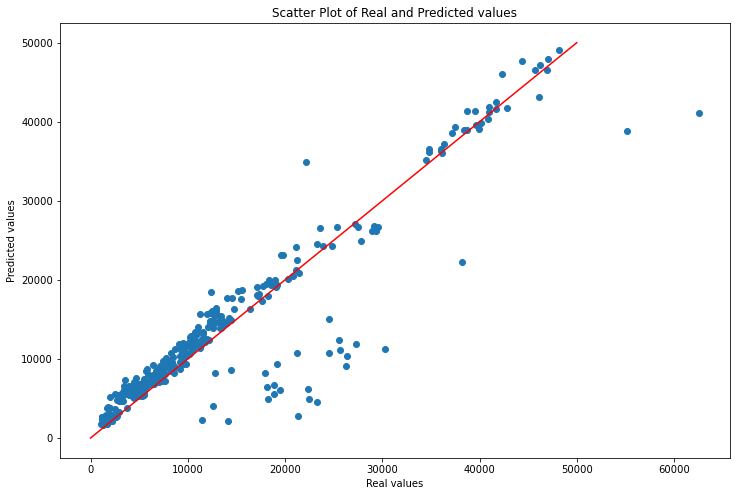

In [51]:
# Creating a scatter plot
plt.figure(figsize=(12,8))

plt.scatter(y_test.values, y_pred.values)
plt.plot([0,50000],[0,50000],color='red')

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Scatter Plot of Real and Predicted values')



## As we can see the model has the tendacy to underestimate real values 